In [156]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [157]:
estate_data = pd.read_csv("Real estate.csv")
estate_data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


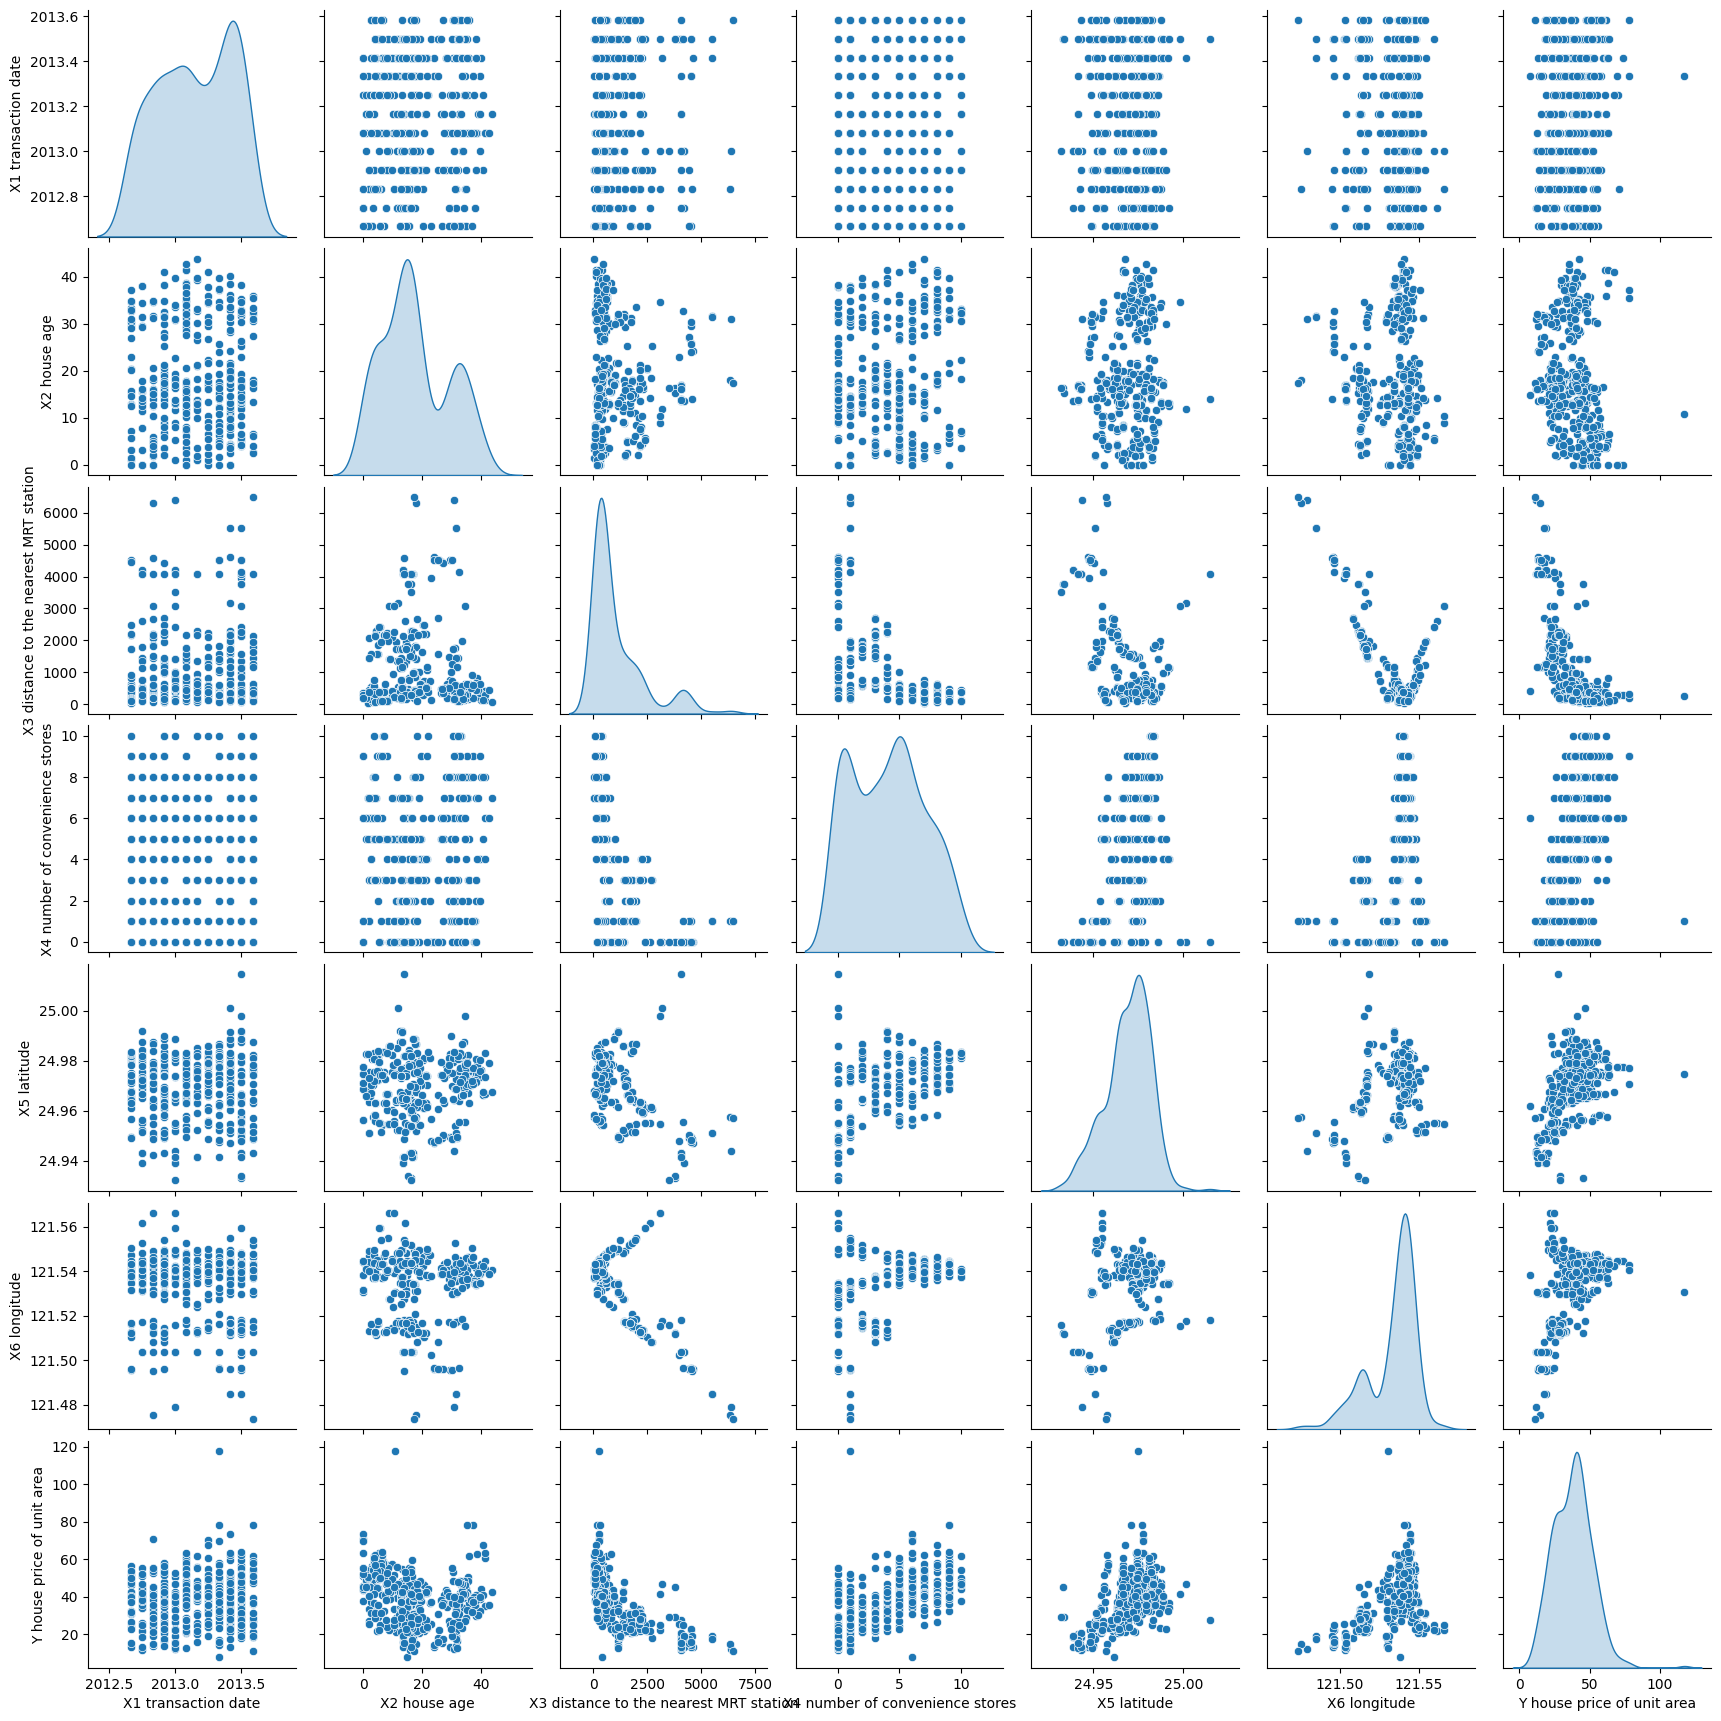

In [169]:
sns.pairplot(data=estate_data.drop("No",axis=1) , diag_kind="kde")
#plt.plot (estate_data[""],estate_data["Y house price of unit area"])

In [159]:
X = estate_data.drop("Y house price of unit area", axis= 1)
y = estate_data["Y house price of unit area"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)


In [160]:
model = DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)


In [161]:
MAE = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute error for this model is {MAE}")

Mean Absolute error for this model is 5.8048


In [162]:
MSE = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error for this model is {MSE}")

Mean Squared Error for this model is 71.77984000000001


In [163]:
RMSE = np.sqrt(MSE) # RMSE = MSE**0.5 or RMSE = sqrt(MSE) 
print(f"Root Mean Squared Error for this model is {RMSE}")

Root Mean Squared Error for this model is 8.472298389457256


In [164]:
tolerance = RMSE / y.mean()
print(f" Tolerance for this model based on prediction value = {tolerance}")

 Tolerance for this model based on prediction value = 0.22307149246589908


In [165]:
model_score = r2_score(y_test,y_pred)
print(f" R2_score for our model is {model_score}")

 R2_score for our model is 0.625038843931061


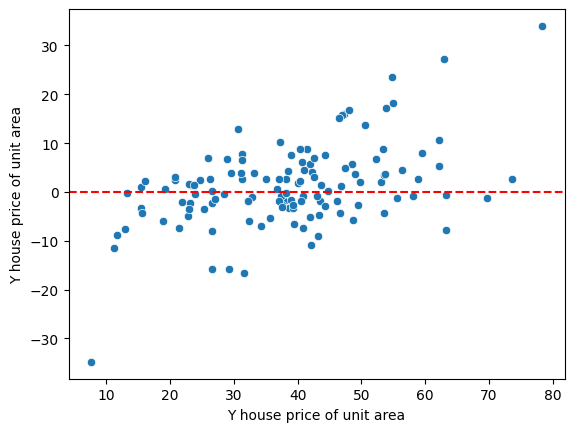

In [166]:
residual_error = y_test - y_pred
sns.scatterplot(x = y_test , y = residual_error)
plt.axhline(y=0 , color = "red" , linestyle = "--")